In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import loguniform
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import torch

# Pre_Processing Stage

In [3]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#For Training data
col_names = df.columns
col_numeric = df._get_numeric_data().columns
col_categorical = list(set(col_names)-set(col_numeric))

#Since the data_observations are not very large, using interpolate method to get the approximate values.
for i in col_numeric:
    df[i].interpolate(inplace = True)
    
#Using Replace method to change NA values to Nill.
#As the categorical variables are concerned NA represents that specific feature is not present in the house. So, technically
#its not a missing value, indeed a data.
le = LabelEncoder()
for i in range(len(col_categorical)):
    labeli = le.fit_transform(df[col_categorical[i]])
    df.drop(col_categorical[i], axis = 1, inplace = True)
    df[col_categorical[i]] = labeli

#For testing data    
col_names_test = df_test.columns
col_numeric_test = df_test._get_numeric_data().columns
col_categorical_test = list(set(col_names_test)-set(col_numeric_test))

#Since the data_observations are not very large, using interpolate method to get the approximate values.
for i in col_numeric_test:
    df_test[i].interpolate(inplace = True)
    
#Using Replace method to change NA values to Nill.
#As the categorical variables are concerned NA represents that specific feature is not present in the house. So, technically
#its not a missing value, indeed a data.
le = LabelEncoder()
for i in range(len(col_categorical_test)):
    labeli = le.fit_transform(df_test[col_categorical_test[i]])
    df_test.drop(col_categorical_test[i], axis = 1, inplace = True)
    df_test[col_categorical_test[i]] = labeli
df_test.isnull().values.any()

False

In [4]:
col_names

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Constructing Dataframe

In [4]:
#Constructing the dataframe

x_train = pd.DataFrame(df.drop(labels= ["SalePrice"], axis = 1))
y_train = pd.DataFrame(df["SalePrice"])

x_test = pd.DataFrame(df_test)

#Normalizing the data to apply Lasso Regularisation for Feature Selection.

#Test_Train Split data
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train, test_size = 0.2, random_state = 41)

# Tuning_alpha_character

In [42]:
pipeline = Pipeline([
    ("scaler1",StandardScaler()),
    ("model1", Lasso())
])

search = GridSearchCV(pipeline,
                     {"model1__alpha": loguniform.rvs(1e-2,100, size = 10)},cv = 10,
                      scoring = "neg_mean_squared_error", n_jobs = -1
                     )


In [43]:
search.fit(X_train,Y_train)
#We are using the alpha i-e hypertuning parameter value as shown above and for each value we perform 
#10-fold CV. Minimum the error that generates we pick that coresponding alpha as our optimum value aka best fit.

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler1', StandardScaler()),
                                       ('model1', Lasso())]),
             n_jobs=-1,
             param_grid={'model1__alpha': array([1.70893856e-02, 6.05147518e+01, 1.81215775e+00, 1.79929252e-01,
       3.62571277e+01, 7.39974109e-02, 4.08399925e+01, 8.84670787e-02,
       5.73079357e-02, 2.50538649e-01])},
             scoring='neg_mean_squared_error')

In [45]:
#Finding the best alpha value:
search.best_params_

{'model1__alpha': 60.514751752468456}

In [46]:
feature_parameters = search.best_estimator_[1].coef_
feature_parameters

array([  -609.66052713,  -5377.63178181,  -4910.35920532,   2646.1035025 ,
        14661.75956973,   5664.25679961,   5340.72323162,     -0.        ,
         6919.08761439,   2124.60463123,    546.99804708,  -1991.87732368,
            0.        ,   3078.16802752,      0.        ,  -1784.06774176,
        22851.67830363,   3146.17409981,   -499.05353472,   3114.81716394,
          466.66703448,  -2906.83073973,  -1792.96623502,   5525.55518058,
         1359.65713905,   -687.72703055,   9275.83128004,   -933.67682376,
         2268.99702643,   -195.69800734,   -573.6576661 ,   1044.82168773,
         2534.31696705, -14291.24756883,    194.48474547,  -1505.28467342,
        -1682.33800729,   1825.37949677,   -423.02991618,  -1608.62765096,
        -4225.88615467,  -4774.37740511,   1114.83676009,   4006.68836087,
         -687.72403249,  -1949.2837426 ,    365.4758838 ,   2807.89989949,
         1086.26091944,   -455.52301463,      0.        ,  -1409.83585278,
        -8147.99723019,  

In [47]:
coefficients = search.best_estimator_.named_steps['model1'].coef_
importance = np.abs(coefficients)
importance
required_col = np.array(list(col_names[:80]))[importance!=0]
insignificant_col = list(set(col_names) - set(required_col))
required_col.shape
#After applying Lasso Feature Extraction, these are the significant features.

(75,)

In [48]:
X_lasso = X_train[required_col]
X_lasso_tst = X_test[required_col]

# Models without using Lasso

In [49]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)
prediction_model1 = model1.predict(X_test)
r_squared = r2_score(Y_test,prediction_model1)
r_squared

0.8628246431550322

In [50]:
import math as math
math.sqrt(np.mean((prediction_model1-Y_test)**2, axis = 0))

27048.294546436202

# Models with Lasso using alpha as 60 

In [51]:
model1_lasso = LinearRegression()
model1_lasso.fit(X_lasso,Y_train)
prediction_model1_lasso = model1_lasso.predict(X_lasso_tst)
r_squared = r2_score(Y_test,prediction_model1_lasso)
r_squared

0.8643380268198588

In [52]:
math.sqrt(np.mean((prediction_model1_lasso-Y_test)**2, axis = 0))

26898.67592229565

Conclusion: Upon using alpha as 65 the test accuracy has gone up but the model has only eliminated five features. Still the variance of the model has not reduced significantly

The RMSE value of model using lasso regularization with alpha value as 2780 has yielded the model with 29 independent features, which has significantly reduced the variance of the model. Apart from these the accuracy of the model still remains at 0.77 which is not bad with using 27 predictors.

# Gradient Boost Algorithm 

In [53]:
space = {
    "learning_rate" : [0.001,0.01,0.05,0.1,0.15,0.2],
    "n_estimators": [100,200,300,400,500]
}
search = GridSearchCV(GradientBoostingRegressor(), space, scoring = "neg_mean_absolute_error", n_jobs = -1, cv = 10)

In [74]:
search.fit(X_train,np.ravel(Y_train))

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_absolute_error')

In [14]:
search.best_params_

{'learning_rate': 0.05, 'n_estimators': 500}

In [56]:
learning_rate = [0.001,0.01,0.05,0.1,0.15,0.2]
r_squared_tst = []
r_squared_tr = []
for i in learning_rate:
    model = GradientBoostingRegressor(learning_rate = i, n_estimators = 500, subsample = 0.75)
    model.fit(X_train,np.ravel(Y_train))
    pred_tst = model.predict(X_test)
    pred_tr = model.predict(X_train)
    r_squared_tst.append(r2_score(np.ravel(Y_test),pred_tst))
    r_squared_tr.append(r2_score(np.ravel(Y_train),pred_tr))
    

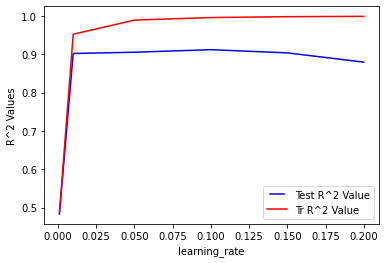

In [50]:
#Since the number of predictors are high by shrinking the size of number of predictors available will reduce the variance
#It can be acheived by varying the subsample size
space2 = {
    "learning_rate" : [0.05,0.75,0.25],
    "n_estimators": [500],
    "subsample" : [0.5,0.75,0.8,0.85,0.9,1]
}
search2 = GridSearchCV(GradientBoostingRegressor(), space2, scoring = "neg_mean_absolute_error", n_jobs = -1, cv = 10)

In [51]:
search2.fit(X_train,np.ravel(Y_train))


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.75, 0.25],
                         'n_estimators': [500],
                         'subsample': [0.5, 0.75, 0.8, 0.85, 0.9, 1]},
             scoring='neg_mean_absolute_error')

In [53]:
search2.best_params_

{'learning_rate': 0.05, 'n_estimators': 500, 'subsample': 0.75}

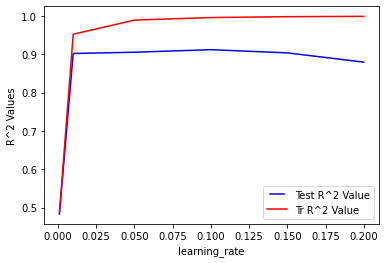

In [60]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rate, r_squared_tst, "b", label="Test R^2 Value")
line2, = plt.plot(learning_rate, r_squared_tr, "r", label="Tr R^2 Value")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R^2 Values")
plt.xlabel("learning_rate")
plt.show()

In [ ]:
#We can choose value of learning_rate as 0.02 instead of 0.05 which was determined by the Gridsearch, as the difference in the 
#R_squared value is not significant. Having a lower learning_rate will build a model with lower variance.

In [55]:
final_model = GradientBoostingRegressor(learning_rate = 0.02, n_estimators = 500, subsample = 0.75)
final_model.fit(X_train,np.ravel(Y_train))
pred_tst = final_model.predict(X_test)
import math as math
rmse_tst = math.sqrt(np.mean((np.ravel(Y_test)-pred_tst)**2))
print("Test RMSE value using Gradient Boosting with Original Dataset: ", rmse_tst)

Test RMSE value using Gradient Boosting with Original Dataset:  22882.73921585675


In [56]:
final_model_lasso = GradientBoostingRegressor(learning_rate = 0.02, n_estimators = 500, subsample = 0.75)
final_model_lasso.fit(X_lasso,np.ravel(Y_train))
pred_tst_ = final_model_lasso.predict(X_lasso_tst)
import math as math
rmse_tst_lasso = math.sqrt(np.mean((np.ravel(Y_test)-pred_tst_)**2))
print("Test RMSE value using Gradient Boosting with Lasso Dataset: ", rmse_tst_lasso)

Test RMSE value using Gradient Boosting with Lasso Dataset:  22813.747235678024


# Feature Importance

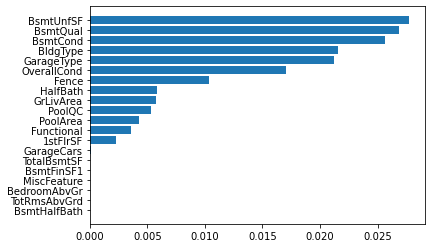

In [57]:
#Plotting Feature Importance
feature_imp = final_model.feature_importances_

#Normalizing the feature importances gives us ease of interpretation
feature_imp = 100*(feature_imp/(max(feature_imp)))
sorted_idx = np.argsort(feature_imp)
sorted_idx_20 = sorted_idx[:20]
#Lets plot for the top 20 features
pos = np.arange(sorted_idx_20.shape[0])+0.5
plt.barh(pos, feature_imp[sorted_idx_20], align= "center")
plt.yticks(pos,col_names[sorted_idx_20])
plt.show()

In [58]:
sorted_idx_20

array([48, 54, 51, 74, 34, 38, 61, 43, 55, 71, 72, 46, 50, 73, 18, 58, 15,
       31, 30, 37], dtype=int64)

# Two-Dimensional Representation of Dataset using PCA

In [121]:
np.random.seed(10)
U,S,V_T = np.linalg.svd(x_train)
V = np.transpose(V_T)
two_dim_red = V[:,:2]
discriminant_scores = np.dot(x_train,two_dim_red)


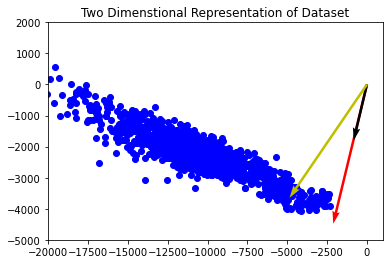

In [122]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x = np.ravel(discriminant_scores[:,0]), y = np.ravel(discriminant_scores[:,1]), c = "blue")
ax1.quiver([0],[0],two_dim_red[sorted_idx_20[0]][0], two_dim_red[sorted_idx_20[0]][1],scale_units = "width",color= "r", scale = 0.002)
ax1.quiver([0],[0], two_dim_red[sorted_idx_20[1]][0], two_dim_red[sorted_idx_20[1]][1],scale_units = "width",scale = 0.005, color = "black")
ax1.quiver([0],[0], two_dim_red[sorted_idx_20[2]][0], two_dim_red[sorted_idx_20[2]][1],scale_units = "width" ,scale =2*(1e-7) , color = "y")
plt.xlim(-20000,1000)
plt.ylim(-5000,2000)
plt.title("Two Dimenstional Representation of Dataset")
plt.show()
#POINTS TO NOTE FROM THE PLOT:

#POINT-ONE: The first two principal components corresponding to the most important features are pointing towards the "discriminant 
#score" of the entire dataset. It tells that any observation present along the vector, more the magnitude more the influence 
#of that paticular feature on that observation.
#POINTS_TWO: If vectors are aligned closely it represents the collinearity among them. 
#

Conclusion : Overall Condition feature with observations varying from 1 - 10, 10 being the very excellent condition of the house has a very high say in predicting the house price.
2) Also having additional half bathroom at Basement of the house are considered to be more expensive.
3) If the house is under sale for a longer time then the price of the house comes down substanstially. Also having a full bathroom fetches more value to the house.
4) Having more Open Porch Area increases the price of the house more.